<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Thierry Parmentelat &amp; Arnaud Legout</span>
</div>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

# l'ensemble de Mandelbrot

il s'agit de calculer l'image de la convergence de mandelbrot:

<img src="media/mandelbrot.svg">

## comment ça marche ?

* dans l'espace complexe, on définit pour chaque $c\in\mathbb{C}$ la suite
   * $z_0 = c$
   * $z_{n+1} = z_n^2 + c$
* on démontre que 
  * lorsque $|z_n|>2$, la suite diverge

il s'agit pour nous de 

* partir d'un pavé rectangulaire  
  par exemple sur la figure, on a pris l'habituel  
  $re \in [-2, 0.8]$ et  $im \in [-1.4, 1.4]$
* découper ce pavé en un maillage de $w \times h$ points  
  (sur la figure, 1000 x 1000)
* on se fixe un nombre maximal `max` d'itérations (disons 20)
  * et pour chaque point du maillage, on va calculer si la suite diverge avant `max` itérations
* c'est-à-dire plus spécifiquement on calcule un tableau `diverge` de la taille du maillage
  * pour chaque point `z`, on calcule les `max` premiers termes de la suite
  * et à la première itération `n` où la suite diverge (son module est supérieur à 2)  
    alors on affecte `diverge[z] = n`
* on n'a plus qu'à afficher ensuite l'image obtenue avec `plt.imshow`

*indices*

* pour fabriquer la grille des points de départ, 
  on pourra regarder `np.linspace` et `np.meshgrid`

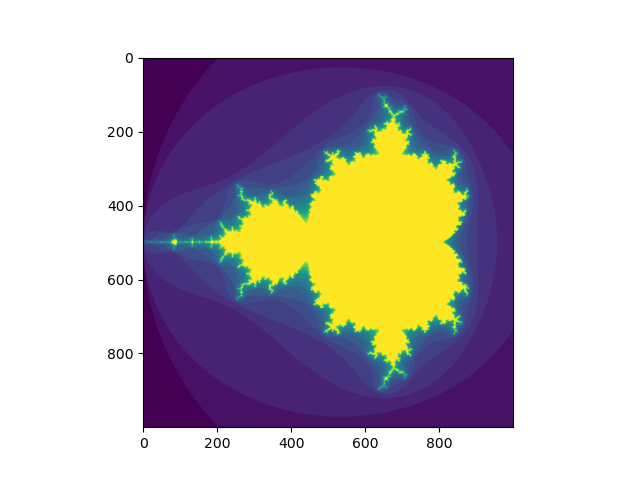

In [7]:
# à vous de jouer
def mandelbrot(w, h):
    max = 20

    Re = np.linspace(-2,0.8, w)
    Im = np.linspace(-1.4,1.4, h)
    numr, numi = np.meshgrid(Re,Im) #creation des array partie Im/Re
    num = numr + 1j*numi #array des valeurs de depart
    num0 = num.copy() #copie pour la constante c dans le calcul

    diverge = -np.ones((w,h)) #array pour stocker la duree avant divergeance. On initialise a -1 pour reperer facilement les termes pour lesquels on n'a pas encore calcule le rang

    for t in range(max+1):

        small = (np.abs(num) <= 2) #suites qui ne divergent pas
        notDone = (diverge == -1) #suites qui n'ont pas deja ete calculees
        
        diverge[~small & notDone] = t #suites qui ont diverge a CETTE etape
        num[small & notDone] = np.square(num[small & notDone]) + num0[small & notDone] #calcul du terme d'apres pour les suites concernees

    diverge[notDone]=max+1
    return diverge

res = mandelbrot(1000,1000)
plt.imshow(res)
plt.show()



## v2

* on peut passer en paramètre à la fonction
  * le domaine en x et en y
  * le nombre maximum d'itérations
* on veut pouvoir produire une image (pour l'insérer dans l'énoncé par exemple)
  * quels formats sont disponibles ?
  * sauvez votre image dans un format vectoriel
  * affichez cette depuis votre notebook

In [15]:
def mandelbrot_v2(w, h, X, Y, max): #X,Y sont des listes de 2 float / 2-tuples
    
    Re = np.linspace(X[0],X[1], w)
    Im = np.linspace(Y[0],Y[1], h)
    numr, numi = np.meshgrid(Re,Im)
    num = numr + 1j*numi
    num0 = num.copy()

    diverge = -np.ones((w,h))

    for t in range(max+1):

        small = (np.abs(num) <= 2)
        notDone = (diverge == -1)
        
        diverge[~small & notDone] = t
        num[small & notDone] = np.square(num[small & notDone]) + num0[small & notDone]

    diverge[notDone]=max+1
    return diverge

res = mandelbrot_v2(1000,1000,(-0.4,0.2),(-1.3,-0.7),50)
plt.imshow(res)
plt.savefig('media/mandelbrot2.svg') #formats possibles png, pdf, svg, ...



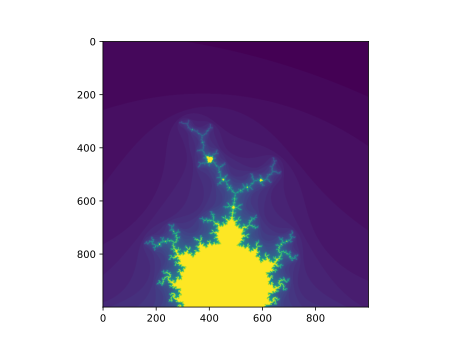

In [22]:
from IPython.display import SVG
SVG(filename='media/mandelbrot2.svg')